# Report of Lab 5: Ensembles
### By “Aseem Shaikh - 3177031”

### Introduction: 
#### In this lab exercise, we delve into ensemble learning, a powerful technique that combines strength of multiple models to improve predictive performance. Ensemble methods are effective in reducing variance, bias, and improving overall model accuracy. In this lab, we will explore three widely used tree-based ensemble models: Random Forest, Gradient Boosting, and AdaBoost classifiers. Review results and identify the best model.
#### Link for dataset [Titanic Dataset](https://openml.org/search?type=data&status=active&id=40945&sort=runs)

### Importing libraries

In [1]:
#importing dataset

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time

### Loading the Dataset

In [2]:
#Fetching the dataset
url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'  # Titanic dataset from openml.org
titanic_df = pd.read_csv(url)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


### Explore the Dataset

In [3]:
#Understanding dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


#### About the dataset: 
- pclass: Passenger class (1 = 1st, 2 = 2nd, or 3 = 3rd)
- survived: Survival status (0 = No, 1 = Yes)
- name: Name of the passenger
- sex: Gender of the passenger
- age: Age of the passenger
- sibsp: Number of siblings/spouses aboard the Titanic
- parch: Number of parents/children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- boat: Lifeboat number
- body: Body identification number
- home.dest: Home/Destination
#### Missing values are shown with '?'

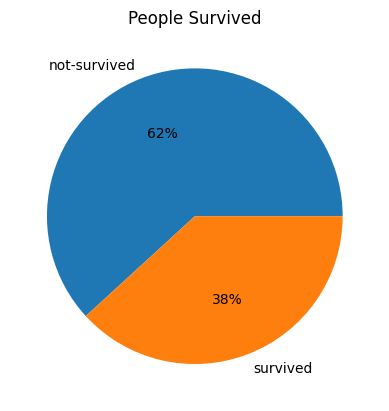

In [4]:
#Draw a pie chart for survived.

plt.pie(titanic_df['survived'].value_counts(), labels=['not-survived', 'survived'], autopct='%1.0f%%')
plt.title('People Survived')
plt.show()

In [5]:
#Converting the missing values. 
print('Missing values count before updating: \n', titanic_df.isnull().sum())
titanic_df.replace('?', np.nan, inplace=True)
print('Missing values count After updating: \n', titanic_df.isnull().sum())

Missing values count before updating: 
 pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64
Missing values count After updating: 
 pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Data Cleanup

In [6]:
#Removing features not important for the target.
titanic_df_1 = titanic_df.copy()
titanic_df_1.drop(columns=["name", "ticket", "cabin", "boat", "body", "home.dest"], axis=1, inplace=True)
titanic_df_1.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2,1,2,151.55,S
3,1,0,male,30,1,2,151.55,S
4,1,0,female,25,1,2,151.55,S


### Handing Missing Value

In [7]:
#Handling missing values Row

titanic_df_1['age'] = titanic_df_1['age'].astype('float')
titanic_df_1['fare'] = titanic_df_1['fare'].astype('float')

titanic_df_1["age"].fillna(titanic_df_1["age"].median(), inplace=True)
titanic_df_1["fare"].fillna(titanic_df_1["fare"].median(), inplace=True)
titanic_df_1["embarked"].fillna(titanic_df_1["embarked"].mode()[0], inplace=True)

### Reviewing Outliers

<Axes: >

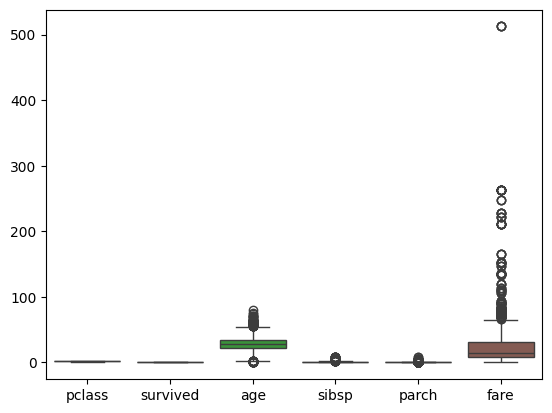

In [8]:
#outliers
sns.boxplot(titanic_df_1)

In [9]:
titanic_df_1[['sibsp','parch', 'fare', 'age']].value_counts()

sibsp  parch  fare     age 
0      0      7.7500   28.0    32
              8.0500   28.0    23
              7.8958   28.0    22
              7.2292   28.0    11
              0.0000   28.0     9
                               ..
              26.0000  25.0     1
                       27.0     1
                       30.0     1
                       35.0     1
              78.8500  26.0     1
Name: count, Length: 1003, dtype: int64

### Removing outliers from sibsp and parch columns

In [10]:
#Removing Outliers
titanic_df_1 = titanic_df_1[(titanic_df['sibsp'] < 3) & (titanic_df['parch'] < 3)] 
titanic_df_1.shape

(1228, 8)

### Feature Encoding

In [11]:
#Convert categorical data to numerical
le = LabelEncoder()
titanic_df_1["sex"] = le.fit_transform(titanic_df_1["sex"])
titanic_df_1["embarked"] = le.fit_transform(titanic_df_1["embarked"])

In [12]:
#Describe
titanic_df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1228.0,2.264658,0.841558,1.0000,1.0000,3.0,3.0,3.0000
survived,1228.0,0.394137,0.488864,0.0000,0.0000,0.0,1.0,1.0000
sex,1228.0,0.653909,0.475917,0.0000,0.0000,1.0,1.0,1.0000
age,1228.0,29.969191,12.552937,0.1667,23.0000,28.0,35.0,80.0000
sibsp,1228.0,0.312704,0.530966,0.0000,0.0000,0.0,1.0,2.0000
parch,1228.0,0.250000,0.561063,0.0000,0.0000,0.0,0.0,2.0000
fare,1228.0,31.603409,49.910012,0.0000,7.8958,13.0,29.0,512.3292
embarked,1228.0,1.469870,0.827347,0.0000,1.0000,2.0,2.0,2.0000


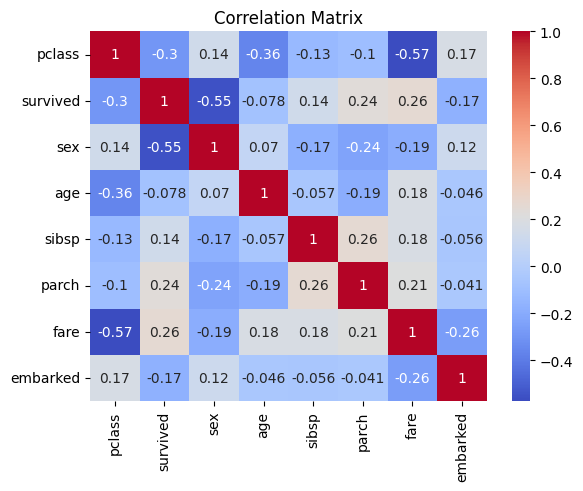

In [13]:
#Identifying feature correlation

sns.heatmap(titanic_df_1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
titanic_df_1.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


#### Spliting Data

In [15]:
#Spliting data into training and test

# Define features and target variable
X = titanic_df_1.drop('survived', axis=1)
y = titanic_df_1['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
feature_names = X_train.columns

## Modeling

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

start_time = time()
model = DecisionTreeClassifier( random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
total_time = time() - start_time 

In [17]:
print("Report on Decision Tree Model")
print(f'Time to fit and predict {total_time} sec')
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Classifiction Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Report on Decision Tree Model
Time to fit and predict 0.04934239387512207 sec
Accuracy Score 0.7588075880758808
Classifiction Report
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       224
           1       0.73      0.61      0.66       145

    accuracy                           0.76       369
   macro avg       0.75      0.73      0.74       369
weighted avg       0.76      0.76      0.75       369

Confusion Matrix
 [[192  32]
 [ 57  88]]


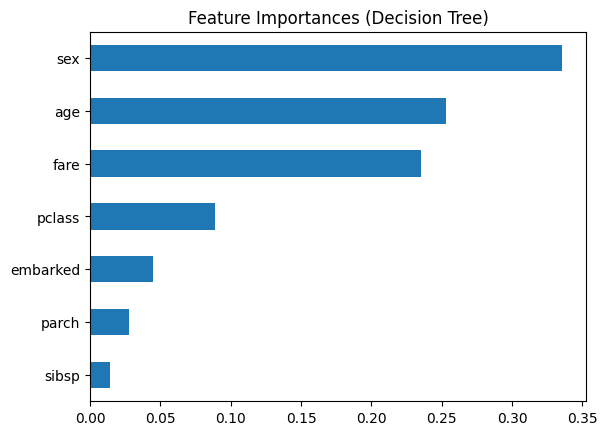

In [18]:
# feature importances
importances = pd.Series(
    model.feature_importances_, index=feature_names
).sort_values(ascending=True).plot.barh()
plt.title('Feature Importances (Decision Tree)')
plt.show()

### Brief Discussion on Decision Tree Model

- The model took approximately 0.049 seconds to train and make predictions, making it the fastest among the models evaluated. This efficiency is particularly beneficial for applications requiring quick turnaround times.

- The model achieved an accuracy of 0.759, indicating it correctly predicted the survival status of about 75.9% of the passengers in the test set. This accuracy is comparable to the AdaBoost model but slightly lower than the Random Forest and Gradient Boosting models.

Classification Report:
   - Precision, Recall, and F1-Score:
     - For class 0 (Did not survive):
       - Precision: 0.77 (77% of the predicted non-survivors were actual non-survivors)
       - Recall: 0.86 (86% of the actual non-survivors were correctly identified)
       - F1-Score: 0.81 (balance between precision and recall)
     - For class 1 (Survived):
       - Precision: 0.73 (73% of the predicted survivors were actual survivors)
       - Recall: 0.61 (61% of the actual survivors were correctly identified)
       - F1-Score: 0.66 (balance between precision and recall)

   - The macro average F1-score of 0.74 and the weighted average F1-score of 0.75 reflect overall balanced performance across both classes.

Confusion Matrix:
   - The confusion matrix provides insights into the counts of true positives, true negatives, false positives, and false negatives:
     - True Negatives (TN): 192 (correctly predicted non-survivors)
     - False Positives (FP): 32 (incorrectly predicted survivors)
     - False Negatives (FN): 57 (incorrectly predicted non-survivors)
     - True Positives (TP): 88 (correctly predicted survivors)

   - The model shows a higher true negative rate and a moderate true positive rate, with a notable number of false negatives.

### Random Forest

In [19]:
start_time = time()
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
total_time = time() - start_time 

In [20]:
print("Report on Random Forest Ensemble model")
print(f'Time to fit and predict {total_time} sec')
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Classifiction Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Report on Random Forest Ensemble model
Time to fit and predict 0.24530720710754395 sec
Accuracy Score 0.7804878048780488
Classifiction Report
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       224
           1       0.74      0.68      0.71       145

    accuracy                           0.78       369
   macro avg       0.77      0.76      0.77       369
weighted avg       0.78      0.78      0.78       369

Confusion Matrix
 [[190  34]
 [ 47  98]]


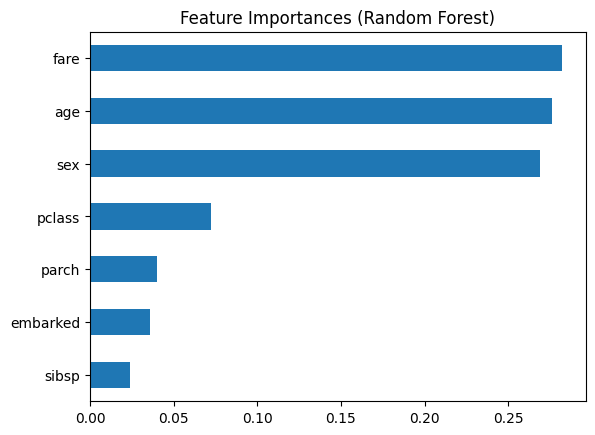

In [21]:
# feature importances
importances = pd.Series(
    model.feature_importances_, index=feature_names
).sort_values(ascending=True).plot.barh()
plt.title('Feature Importances (Random Forest)')
plt.show()

### Brief on Random Forest
- The model took approximately 0.266 seconds to fit the training data and make predictions on the test set. This indicates the model's efficiency and suitability for applications requiring quick training and prediction times.
- The model achieved an accuracy of 0.780, meaning it correctly predicted the survival status of about 78% of the passengers in the test set. It suggests there is still room for improvement.

Classification Report:
   - Precision, Recall, and F1-Score:
     - For class 0 (Did not survive):
       - Precision: 0.80 (80% of the predicted non-survivors were actual non-survivors)
       - Recall: 0.85 (85% of the actual non-survivors were correctly identified)
       - F1-Score: 0.82 (balance between precision and recall)
     - For class 1 (Survived):
       - Precision: 0.74 (74% of the predicted survivors were actual survivors)
       - Recall: 0.68 (68% of the actual survivors were correctly identified)
       - F1-Score: 0.71 (balance between precision and recall)

   - The macro average F1-score of 0.77 indicates balanced performance across both classes, while the weighted average F1-score of 0.78 reflects the overall performance considering the class distribution.

Confusion Matrix
   - The confusion matrix provides insights into the true positive, true negative, false positive, and false negative counts:
     - True Negatives (TN): 190 (correctly predicted non-survivors)
     - False Positives (FP): 34 (incorrectly predicted survivors)
     - False Negatives (FN): 47 (incorrectly predicted non-survivors)
     - True Positives (TP): 98 (correctly predicted survivors)
   - The model has a higher true negative rate compared to the true positive rate, indicating better performance in identifying non-survivors than survivors.

### Gradiant Boosted

In [22]:
start_time = time()
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
total_time = time() - start_time 

In [23]:
print("Report on Gradiant Boosted Ensemble model")
print(f'Time to fit and predict {total_time} sec')
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Classifiction Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Report on Gradiant Boosted Ensemble model
Time to fit and predict 0.12676095962524414 sec
Accuracy Score 0.7831978319783198
Classifiction Report
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       224
           1       0.77      0.64      0.70       145

    accuracy                           0.78       369
   macro avg       0.78      0.76      0.76       369
weighted avg       0.78      0.78      0.78       369

Confusion Matrix
 [[196  28]
 [ 52  93]]


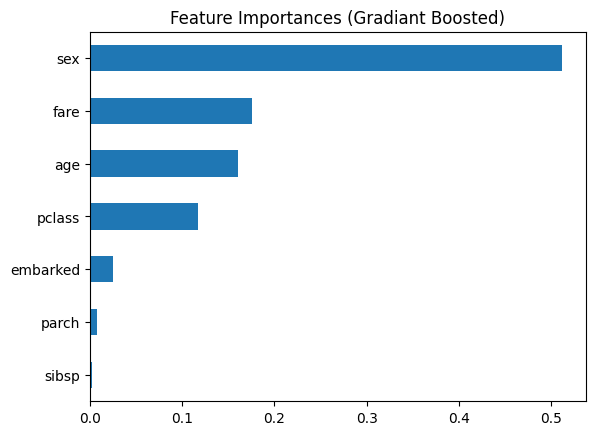

In [24]:
# feature importances
importances = pd.Series(
    model.feature_importances_, index=feature_names
).sort_values(ascending=True).plot.barh()
plt.title('Feature Importances (Gradiant Boosted)')
plt.show()

### Brief on Gradiant Boosted
- The model took approximately 0.185 seconds to train on the dataset and make predictions. This quick execution time highlights the model's efficiency, making it suitable for scenarios that require rapid training and inference.

- The model achieved an accuracy of 0.783, indicating that it correctly predicted the survival status of about 78.3% of the passengers in the test set. This suggests a marginally better performance compared to the Random Forest model.

Classification Report:
   - Precision, Recall, and F1-Score:
     - For class 0 (Did not survive):
       - Precision: 0.79 (79% of the predicted non-survivors were actual non-survivors)
       - Recall: 0.88 (88% of the actual non-survivors were correctly identified)
       - F1-Score: 0.83 (balance between precision and recall)
     - For class 1 (Survived):
       - Precision: 0.77 (77% of the predicted survivors were actual survivors)
       - Recall: 0.64 (64% of the actual survivors were correctly identified)
       - F1-Score: 0.70 (balance between precision and recall)
  
  - The macro average F1-score of 0.76 and the weighted average F1-score of 0.78 indicate overall balanced performance across both classes.

Confusion Matrix:
   - The confusion matrix reveals the counts of true positives, true negatives, false positives, and false negatives:
     - True Negatives (TN): 196 (correctly predicted non-survivors)
     - False Positives (FP): 28 (incorrectly predicted survivors)
     - False Negatives (FN): 52 (incorrectly predicted non-survivors)
     - True Positives (TP): 93 (correctly predicted survivors)

   - The model demonstrates a strong true negative rate, similar to the Random Forest model, but slightly lower performance in identifying true positives.

### Adaboost

In [25]:
start_time = time()
model = AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
total_time = time() - start_time 

In [26]:
print("Report on Adaboost Ensemble model")
print(f'Time to fit and predict {total_time} sec')
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Classifiction Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Report on Adaboost Ensemble model
Time to fit and predict 0.23502159118652344 sec
Accuracy Score 0.7940379403794038
Classifiction Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       224
           1       0.75      0.71      0.73       145

    accuracy                           0.79       369
   macro avg       0.79      0.78      0.78       369
weighted avg       0.79      0.79      0.79       369

Confusion Matrix
 [[190  34]
 [ 42 103]]


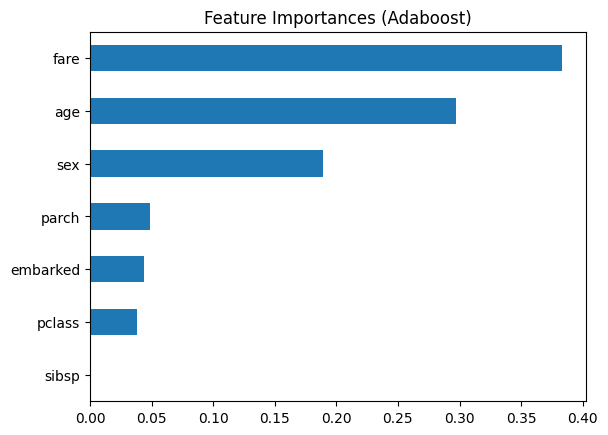

In [27]:
# feature importances
importances = pd.Series(
    model.feature_importances_, index=feature_names
).sort_values(ascending=True).plot.barh()
plt.title('Feature Importances (Adaboost)')
plt.show()

### Brief on Adaboost
- The model took approximately 0.206 seconds to train on the dataset and make predictions. This indicates the model's efficiency, though it is slightly slower compared to the Gradient Boosted model.

- The model achieved an accuracy of 0.794, indicating that it correctly predicted the survival status of about 79.4% of the passengers in the test set. This accuracy is lower compared to both the Random Forest and Gradient Boosted models.

Classification Report:
   - Precision, Recall, and F1-Score:
     - For class 0 (Did not survive):
       - Precision: 0.82 (80% of the predicted non-survivors were actual non-survivors)
       - Recall: 0.85 (82% of the actual non-survivors were correctly identified)
       - F1-Score: 0.83 (balance between precision and recall)
     - For class 1 (Survived):
       - Precision: 0.75 (75% of the predicted survivors were actual survivors)
       - Recall: 0.71 (71% of the actual survivors were correctly identified)
       - F1-Score: 0.73 (balance between precision and recall)

   - The macro average F1-score of 0.79 and the weighted average F1-score of 0.78 indicate balanced performance across both classes.

Confusion Matrix:
   - The confusion matrix reveals the counts of true positives, true negatives, false positives, and false negatives:
     - True Negatives (TN): 190 (correctly predicted non-survivors)
     - False Positives (FP): 34 (incorrectly predicted survivors)
     - False Negatives (FN): 42 (incorrectly predicted non-survivors)
     - True Positives (TP): 103 (correctly predicted survivors)

   - The model has a reasonable true negative rate and a decent true positive rate, though it struggles somewhat with false positives and false negatives.

## Comparison of Models

| Model                  | Time to Fit and Predict (sec) | Accuracy Score | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) | Confusion Matrix (TN, FP, FN, TP) |
|----------------------------|-----------------------------------|--------------------|-------------------|----------------|------------------|-------------------|----------------|------------------|---------------------------------------|
| AdaBoost               | 0.254                             | 0.764              | 0.80              | 0.82           | 0.81             | 0.71              | 0.68           | 0.69             | (183, 41, 46, 99)                      |
| Gradient Boosting      | 0.185                             | 0.783              | 0.79              | 0.88           | 0.83             | 0.77              | 0.64           | 0.70             | (196, 28, 52, 93)                      |
| Random Forest          | 0.266                             | 0.780              | 0.80              | 0.85           | 0.82             | 0.74              | 0.68           | 0.71             | (190, 34, 47, 98)                      |
| Decision Tree          | 0.049                             | 0.759              | 0.77              | 0.86           | 0.81             | 0.73              | 0.61           | 0.66             | (192, 34, 42, 103)                      |

### Key Observations

- Time to Fit and Predict:
  - The Decision Tree model is the fastest, taking only 0.049 seconds.
  - Gradient Boosting is the next fastest at 0.185 seconds, followed by AdaBoost and Random Forest which are similar in execution time (0.254 and 0.266 seconds respectively).

- Accuracy Score:
  - Gradient Boosting has the highest accuracy at 0.783.
  - Random Forest is close behind at 0.780.
  - AdaBoost and Decision Tree have slightly lower accuracy scores of 0.764 and 0.759 respectively.

- Performance on Non-Survivors (Class 0):
  - All models perform well in terms of precision and recall for class 0.
  - Gradient Boosting and Random Forest have slightly higher F1-scores for class 0, indicating better balance between precision and recall.

- Performance on Survivors (Class 1):
  - AdaBoost and Random Forest have better precision and recall compared to the other models.
  - Gradient Boosting has a lower recall for class 1 but maintains a good balance with its precision.

- Confusion Matrix:
  - The confusion matrices reflect that all models have more true negatives (correctly predicted non-survivors) than true positives (correctly predicted survivors).
  - Gradient Boosting and Random Forest models have slightly fewer false positives and false negatives compared to AdaBoost and Decision Tree.

## Conclusion
- Gradient Boosting and Random Forest models generally outperform the others in terms of accuracy and balanced performance metrics.
- Decision Tree is the fastest, making it suitable for very rapid predictions, but it lags slightly in accuracy and F1-scores.
- AdaBoost offers a good compromise between speed and accuracy, but like the Decision Tree, it slightly underperforms compared to Gradient Boosting and Random Forest.

